In [1]:
import pandas_datareader as web
import pandas as pd

tickers = ['^KS11', '039490.KS']

all_data = {}

In [2]:
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

data = web.get_data_yahoo('005930.KS', start='2021-06-01', end='2022-02-09')


[*********************100%***********************]  1 of 1 completed


In [3]:
for ticker in tickers:
    all_data[ticker] = web.get_data_yahoo(ticker, start='2021-06-01', end='2022-02-09')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
ret = prices.pct_change().dropna()

In [5]:
prices

,^KS11,039490.KS
Date,,
2021-06-01,3221.870117,124000.0
2021-06-02,3224.229980,123000.0
2021-06-03,3247.429932,126500.0
2021-06-04,3240.080078,124500.0
2021-06-07,3252.120117,124000.0
...,...,...
2022-01-28,2663.340088,88500.0
2022-02-03,2707.820068,92400.0
2022-02-04,2750.260010,92700.0


In [6]:
ret

,^KS11,039490.KS
Date,,
2021-06-02,0.000732,-0.008065
2021-06-03,0.007196,0.028455
2021-06-04,-0.002263,-0.015810
2021-06-07,0.003716,-0.004016
2021-06-08,-0.001319,-0.008065
...,...,...
2022-01-28,0.018684,0.006826
2022-02-03,0.016701,0.044068
2022-02-04,0.015673,0.003247


In [7]:
import statsmodels.api as sm

ret['intercept'] = 1
reg = sm.OLS(ret[['039490.KS']], ret[['^KS11', 'intercept']]).fit()

In [8]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              039490.KS   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     149.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           6.65e-25
Time:                        22:33:31   Log-Likelihood:                 488.67
No. Observations:                 169   AIC:                            -973.3
Df Residuals:                     167   BIC:                            -967.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^KS11          1.3712      0.112     12.207      0.000       1.149       1.593
intercept     -0.0003      0.001     -0.283      0.778      -0.002       0.002
==============================================================================
Omnibus:                       46.643   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.635
Skew:                           1.159   Prob(JB):                     4.71e-26
Kurtosis:                       6.345   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print(reg.params)

^KS11        1.371189
intercept   -0.000295
dtype: float64


In [10]:
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets[1:20]

['F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly']

In [11]:
import pandas_datareader.data as web

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
                        'famafrench',
                        start='1900-01-01')
df_pbr[0].head()

TypeError: download() got multiple values for argument 'start'

In [12]:
# error solution code

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

spy = pdr.get_data_yahoo('SPY', start='2022-10-24', end='2022-12-23')

print(spy)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-24  375.890015  380.059998  373.109985  378.869995  377.138184   
2022-10-25  378.790009  385.250000  378.670013  384.920013  383.160522   
2022-10-26  381.619995  387.579987  381.350006  382.019989  380.273773   
2022-10-27  383.070007  385.000000  379.329987  379.980011  378.243103   
2022-10-28  379.869995  389.519989  379.679993  389.019989  387.241760   
2022-10-31  386.440002  388.399994  385.260010  386.209991  384.444611   
2022-11-01  390.140015  390.390015  383.290009  384.519989  382.762329   
2022-11-02  383.899994  388.630005  374.760010  374.869995  373.156464   
2022-11-03  371.470001  374.200012  368.790009  371.010010  369.314117   
2022-11-04  377.000000  378.869995  370.000000  376.350006  374.629700   
2022-11-07  377.709991  380.570007  375.529

In [13]:
import pandas as pd
import pandas_datareader as web
# import pymysql
# from sqlalchemy import create_engine

tickers = [
    'SPY',  # 미국 주식
    'IEV',  # 유럽 주식 
    'EWJ',  # 일본 주식
    'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
    'IYR',  # 미국 리츠
    'RWX',  # 글로벌 리츠
    'GLD',  # 금
    'DBC'  # 상품
]

all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start='2022-10-24')#, end='2022-12-23')

prices = pd.DataFrame(
    {tic: data['Adj Close']
     for tic, data in all_data.items()})


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
all_data

{'SPY':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-10-24  375.890015  380.059998  373.109985  378.869995  377.138184   
 2022-10-25  378.790009  385.250000  378.670013  384.920013  383.160522   
 2022-10-26  381.619995  387.579987  381.350006  382.019989  380.273773   
 2022-10-27  383.070007  385.000000  379.329987  379.980011  378.243103   
 2022-10-28  379.869995  389.519989  379.679993  389.019989  387.241760   
 ...                ...         ...         ...         ...         ...   
 2023-02-09  414.410004  414.570007  405.809998  407.089996  407.089996   
 2023-02-10  405.859985  408.440002  405.010010  408.040009  408.040009   
 2023-02-13  408.720001  412.970001  408.239990  412.829987  412.829987   
 2023-02-14  411.239990  415.049988  408.510010  412.640015  412.640015   
 2023-02-15  410.350006  414.059998  409.470001  413.980011  413.980011   
 
                

In [15]:
rets = prices.pct_change(1).dropna()
rets.tail().round(4)

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2023-02-09,-0.0087,0.0016,0.0010,0.0047,-0.0095,-0.0045,-0.0116,-0.0078,-0.0079,-0.0079
2023-02-10,0.0023,-0.0061,0.0057,-0.0096,-0.0112,-0.0048,0.0032,-0.0050,0.0019,0.0142
2023-02-13,0.0117,0.0122,-0.0005,0.0082,0.0084,0.0024,0.0095,0.0029,-0.0051,-0.0021
2023-02-14,-0.0005,0.0046,-0.0050,-0.0017,-0.0023,-0.0045,-0.0088,-0.0025,0.0008,0.0033
2023-02-15,0.0032,-0.0010,-0.0099,-0.0084,-0.0093,-0.0030,0.0044,-0.0122,-0.0100,-0.0107


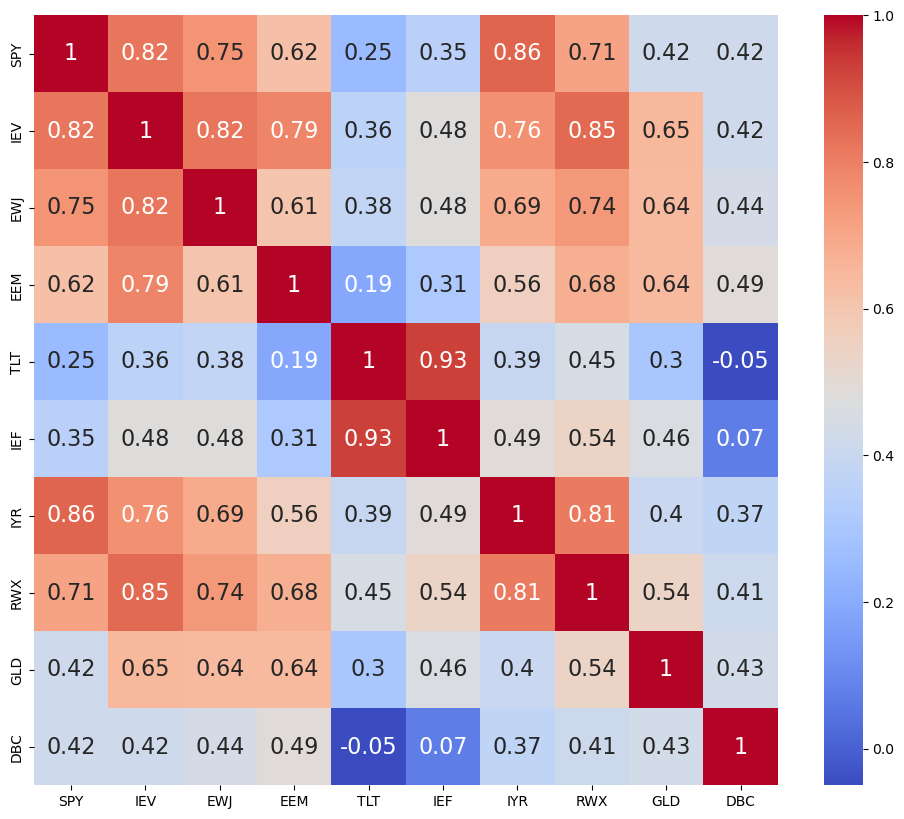

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(rets.corr().round(2), annot = True, annot_kws = {"size" : 16}, cmap='coolwarm')
plt.show()

In [21]:
import riskfolio as rp

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=rets)

# 입력값 계산
method_mu = 'hist'  # 역사적 데이터를 바탕으로 기대 수익률 추정
method_cov = 'hist'  # 역사적 데이터를 바탕으로 분산-공분산 행렬 추정

# 객체에 수익률 및 분산-공분산 입력
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model = 'Classic'  # 모델 입력. Classic(역사적 데이터), BL(블랙-리터만), FM(팩터 모형)
rm = 'MV'  # 위험 측정 방법. MV는 표준편차를 의미
obj = 'Sharpe'  # 목적함수. MinRisk(최소분산), MaxRet(최대수익률), Utility(효용) or Sharpe(샤프지수)
hist = True  # 역사적 데이터 사용
rf = 0  # 무위험 수익률
l = 0  # 위험 회피 계수, obj가 'Utility' 일 때만 사용

# 최적화
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

round(w.T, 4)

ModuleNotFoundError: No module named 'riskfolio'